In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
company_df = pd.read_csv('histories/apple.csv')

In [6]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [7]:
company_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
company_df['Date'] = pd.to_datetime(company_df['Date'])

In [9]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [10]:
company_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [11]:
company_recent_df = company_df[-1000:]

In [12]:
def create_timestamp(year, month=1, day=1):
    return pd.Timestamp('{}-{:02d}-{:02d} 00:00:00'.format(year, month, day))

In [13]:
train_data = company_df[(company_df.Date >= create_timestamp(2005)) & (company_df.Date < create_timestamp(2017))]
test_data = company_df[company_df.Date >= create_timestamp(2017)]

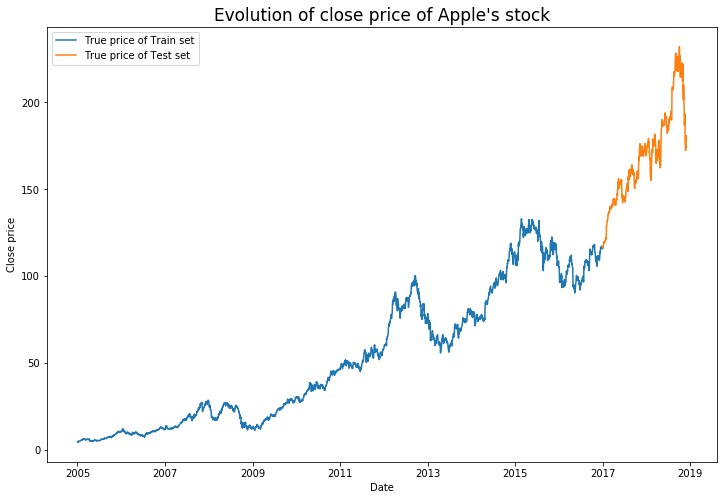

In [14]:
def plot_data(plot_train=True):
    plt.figure(figsize=(12, 8))
    if plot_train:
        plt.plot(train_data.Date, train_data.Close, label='True price of Train set', c='C0')
    plt.plot(test_data.Date, test_data.Close, label='True price of Test set', c='C1')
    plt.title("Evolution of close price of Apple's stock", fontsize=17)
    plt.ylabel("Close price")
    plt.xlabel("Date")

plot_data()
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

def get_x_y_from_df(df, scaler=None):
    df = df.drop('Date', axis=1)
    if scaler is None:
        scaler = StandardScaler().fit(df)
    df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
    return df[:-1], df.Close[1:], scaler

In [16]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03
mean,52.698237,53.208994,52.129651,52.679014,43.141929,1.438625e+08
std,38.596359,38.893638,38.276518,38.586391,37.069011,1.028602e+08
min,4.556428,4.636428,4.471428,4.520714,3.027354,1.147590e+07
25%,17.230000,17.498571,16.969999,17.214285,11.527766,6.956740e+07
50%,46.428570,46.542858,45.931427,46.382858,31.060879,1.181362e+08
75%,85.794289,86.699997,85.037140,86.142860,66.691956,1.898981e+08
max,134.460007,134.539993,131.399994,133.000000,124.616013,8.432424e+08


In [17]:
x_train, y_train, scaler = get_x_y_from_df(train_data)
x_test, y_test, _ = get_x_y_from_df(test_data, scaler)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_model = LinearRegression().fit(x_train, y_train)

In [20]:
linear_model.score(x_train, y_train)

0.9992497478229602

In [21]:
linear_model.score(x_test, y_test)

0.9906165379714393

In [22]:
y_predict = linear_model.predict(x_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


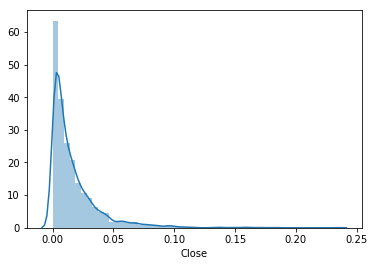

In [23]:
sns.distplot(np.abs(linear_model.predict(x_train) - y_train))

75.52% of correct results with threshold=0.02.


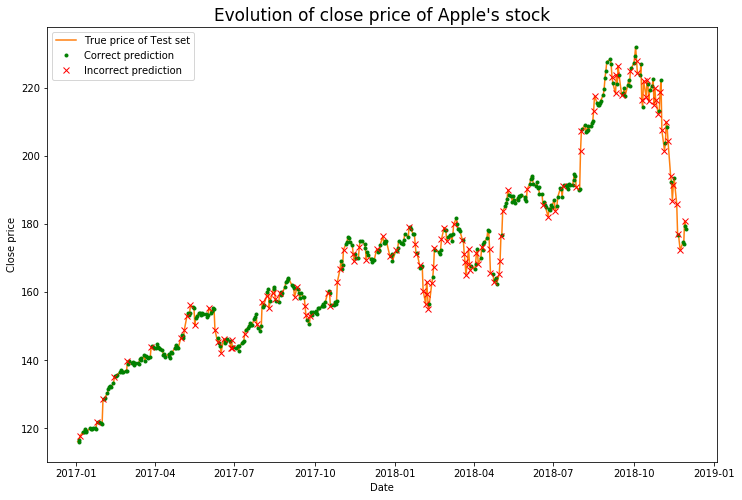

In [24]:
threshold = .02
is_correct = np.array(np.abs(y_predict - y_test)/y_test < threshold)
is_incorrect = np.invert(is_correct)

print("{:.2f}% of correct results with threshold={}.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

index_correct = test_data[np.append(is_correct, False)].index
index_incorrect = test_data[np.append(is_incorrect, False)].index

plot_data(plot_train=False)
plt.plot(test_data.loc[index_correct + 1].Date, test_data.Close.loc[index_correct + 1], 'g.', label='Correct prediction')
plt.plot(test_data.loc[index_incorrect + 1].Date, test_data.Close.loc[index_incorrect + 1], 'rx', label='Incorrect prediction')
plt.legend()
plt.show()

In [25]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume
9093,1.635186,1.623182,1.636531,1.645178,1.874626,-1.118990
9094,1.636481,1.627811,1.662400,1.641809,1.871225,-1.193510
9095,1.638295,1.636811,1.663968,1.657102,1.886660,-1.183052
9096,1.660581,1.670241,1.681214,1.690798,1.920670,-1.090112
9097,1.690899,1.702900,1.719625,1.718792,1.948924,-1.072512


In [26]:
scaler.scale_

array([3.85899705e+01, 3.88872000e+01, 3.82701826e+01, 3.85800039e+01,
       3.70628750e+01, 1.02843194e+08])

In [27]:
def unscale(y):
    return y * scaler.scale_[3] + scaler.mean_[3]

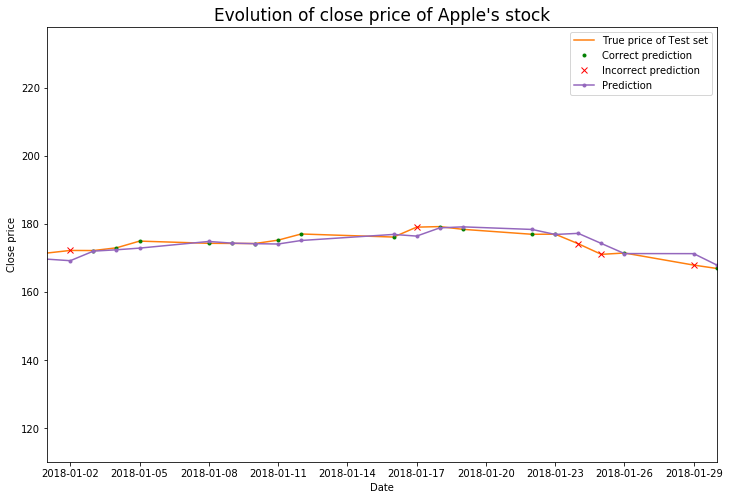

In [28]:
plot_data(plot_train=False)
plt.plot(test_data.loc[index_correct + 1].Date, test_data.Close.loc[index_correct + 1], 'g.', label='Correct prediction')
plt.plot(test_data.loc[index_incorrect + 1].Date, test_data.Close.loc[index_incorrect + 1], 'rx', label='Incorrect prediction')

plt.plot(test_data.Date[1:], unscale(y_predict), 'C4.-', label='Prediction')
plt.legend()
plt.xlim(create_timestamp(2018, 1, 1), create_timestamp(2018, 1, 30))
plt.show()

In [29]:
x_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
linear_model.coef_

array([-6.99124298e-02,  1.66518119e-01,  7.88212790e-02,  8.23263709e-01,
        6.87950491e-04, -7.36512162e-04])

In [31]:
y_predict_same_as_before = x_test.Close.values

In [32]:
is_correct = np.array(np.abs(y_predict_same_as_before - y_test)/y_test < threshold)
is_incorrect = np.invert(is_correct)

print("{:.2f}% of correct results with threshold={} on test set.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

76.56% of correct results with threshold=0.02 on test set.


In [33]:
is_correct = np.array(np.abs(linear_model.predict(x_train) - y_train)/y_train < threshold)
print("{:.2f}% of correct results with threshold={} on train set.".format(is_correct.sum()/is_correct.shape[0]*100, threshold))

74.83% of correct results with threshold=0.02 on train set.
